# This project aims to investigate whether age and recorded playing time of a player are accurate predictors of whether a player is subscribed to the Minecraft newsletter. 

In [1]:
#needed R packages for this project:
library(tidyverse) 
library(repr)
library(tidymodels)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("data/players.csv") #loading the dataset used for the investigation
slice(players_data, 1:8) #for preview

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21


In [3]:
summary(players_data)
summarize(players_data, played_hours_mean = round(mean(played_hours),2), Age_mean = round(mean(Age, na.rm = TRUE),2))

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

played_hours_mean,Age_mean
<dbl>,<dbl>
5.85,21.14


(1) Data Description

This project will be using the "player.csv" dataset that contains information about players who participated in a video game research and their recorded playing time on a Minecraft server. The dataset contains observations from 196 players under the following 7 variables.

- experience (categorical): A rating of how experienced the player is at Minecraft.
- subscribe (logical values) - Whether a player subscribed to the Minecraft newsletter. 
- hashedEmail - Emails of players. 
- played_hours (quantitative)- Time spent on the Minecraft server in hours.
- name - Name of players.
- gender (categorical) - Gender of players as male or female.
- Age (quantitative)- Age of players in years. 

The dataset follows all criteria of a tidy dataset. A problem is that there are  2 missing values in the dataset as shown by the 'summary()' function. A non-observable problem is that whether the order of observations are completely random is not known, thus the 'sample()' function may need to be later used.


(2) Questions

Chosen Broad Question: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?"

Formulated Specific Question: "Can age and playing time of players accurately predict whether a player is subscribed to the Minecraft newsletter?"

The data in the dataset "player.csv" contains “played_hours” and “age” of players as explanatory variables, and “subscribe” as the response variable, which are all variables of interest to predict whether a player is subscribed to the Minecraft newsletter. To prepare the dataset for this classification, the column with these three variables will be retained using the 'select()' function, and the dataframe with these variables will later be split into training and testing datasets. Two rows with missing values (NA) from the dataset need to be dropped with'drop_na()'. Since the subscribe column contains logical values it is best to convert them to factor data type using 'as.factor()'.

In [4]:
#wrangling for classification
players_select <- players_data |> select(subscribe, played_hours, Age) |> drop_na() #columns of intrests are retained and rows with NA dropped
players_select <- mutate(players_select, subscribe = as.factor(subscribe)) #converting logical values to factor data type
slice(players_select, 1:8) #for preview

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21


In [5]:
#computing mean for quantitative variables(played_hours and Age)
summarize(players_data, played_hours_mean = round(mean(played_hours),2), Age_mean = round(mean(Age, na.rm = TRUE),2))

played_hours_mean,Age_mean
<dbl>,<dbl>
5.85,21.14


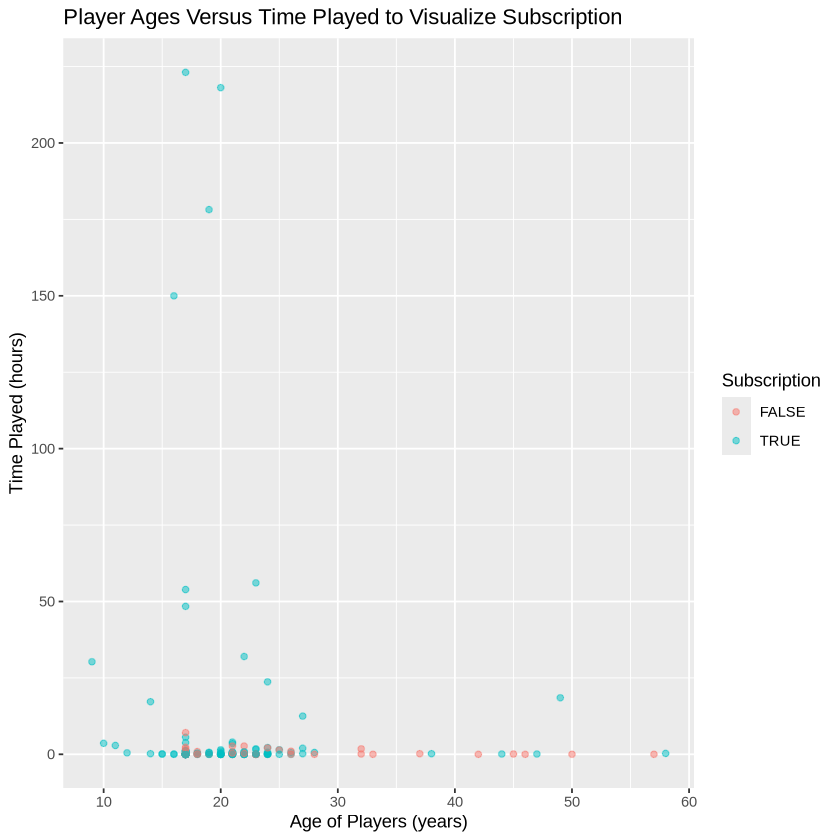

In [6]:
#exploratory visualization for classification 
players_select |> ggplot(
    aes(x = Age, 
        y = played_hours, 
        colour = subscribe)) + 
    labs(x = "Age of Players (years)", y = "Time Played (hours)", colour = "Subscription") + 
    geom_point(alpha = 0.5) +
    ggtitle("Player Ages Versus Time Played to Visualize Subscription")

# Insights: 
# Visualization demonstrates that younger players with higher playing times are more predominantly subscribed. 
# Overlapping datapoints between subscribed and not subscribed players demonstrates potential false predictions. 
# Dataset is imbalenced for subscription.

(4) Method and Plan
- Classification is appropriate because subscription is a categorical variable.
- Set seed for reproducibility, sample() to shuffle, and process the data by splitting the 'player_select' dataset into testing and training data. A 80/20 dataset split will be used under the assumption that having more training data to be split for cross validation is more appropriate.
- The training data will be standardized with centering and scaling.
- Since the dataset is unbalanced in terms of subscription(response variable), step_upsamp ('themis' package) will be used.  
- Set seed then cross validate to compare models with different k neighbours, and select the optimal number of k neighbors to reduce underfitting or overfitting. 
- 5 fold cross validation and 10 fold validation will both be performed and compared for a lower standard error.
- The finalized trained model will be evaluated with testing data and accuracy will be determined to answer the proposed question.

Potential limitations/weaknesses:
- Using ‘step_upsample()’ to account for imbalance introduces overfitting by replicating existing data.
- Many overlaps between subscribed and unsubscribed datapoints as shown in the visualization demonstrate potential false predictors.
- Missing values rows were dropped during wrangling. 
- 80/20 split based on assumptions.
